## Observations and Insights 

In [1]:
pd.set_option('display.max_rows', None)
# use this to see all rows of data set

NameError: name 'pd' is not defined

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice.
len(df["Mouse ID"].unique())
second_df = pd.DataFrame(df.groupby("Mouse ID")["Timepoint"].value_counts())

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# g989 has duplicate values.
second_df.loc[(second_df["Timepoint"] > 1)]

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = df.loc[df["Mouse ID"] != "g989"]
clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [42]:
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [44]:
# Create Summary Table
drugs = pd.DataFrame(clean_mouse_data["Drug Regimen"].unique())
drugs.rename(columns={0: "Drugs"}, inplace=True)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
median = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
var = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
std = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sem = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary dataframe.
drugs = drugs.merge(mean, left_on="Drugs", right_on="Drug Regimen")
drugs = drugs.rename(columns={"Tumor Volume (mm3)": "Mean"})

drugs = drugs.merge(median, left_on="Drugs", right_on="Drug Regimen")
drugs = drugs.rename(columns={"Tumor Volume (mm3)": "median"})

drugs = drugs.merge(var, left_on="Drugs", right_on="Drug Regimen")
drugs = drugs.rename(columns={"Tumor Volume (mm3)": "variance"})

drugs = drugs.merge(std, left_on="Drugs", right_on="Drug Regimen")
drugs = drugs.rename(columns={"Tumor Volume (mm3)": "STD"})

drugs = drugs.merge(sem, left_on="Drugs", right_on="Drug Regimen")
drugs = drugs.rename(columns={"Tumor Volume (mm3)": "SEM"})

drugs

,Drugs,Mean,median,variance,STD,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_table = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_table

# Wow. So much easier.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

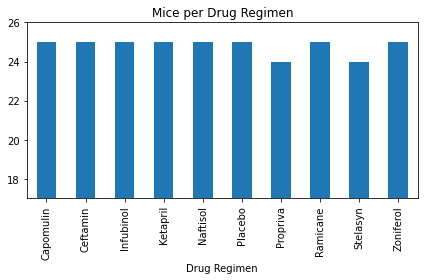

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
num_unique_mice = clean_mouse_data.groupby("Drug Regimen")['Mouse ID'].nunique()
num_unique_mice.plot(kind='bar', title='Mice per Drug Regimen')
plt.ylim(17, 26)
plt.tight_layout()

In [47]:
# TODO Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



<AxesSubplot:title={'center':'Female vs Male'}, ylabel='Mouse ID'>

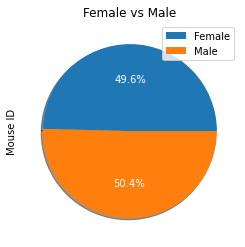

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_unique_sex = clean_mouse_data.groupby("Sex").nunique()
num_unique_sex.plot(kind='pie', y='Mouse ID', title='Female vs Male', shadow=True, autopct="%1.1f%%", textprops={'color':"w"})

In [49]:
# TODO Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_timepoint = clean_mouse_data.groupby("Mouse ID")['Timepoint'].agg('max')
mouse_max_timepoint = pd.DataFrame(mouse_max_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_tumor_per_mouse = mouse_max_timepoint.merge(clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")

In [52]:
max_tumor_per_mouse

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
Didn't work- need to fix this.

# # Put treatments into a list for for loop (and later for plot labels)
# treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# # Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_data = []
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# outliers = pd.DataFrame(data=None, columns=max_tumor_per_mouse.columns)
# for treat in treat_list:
#     # Locate the rows which contain mice on each drug and get the tumor volumes
#     t = max_tumor_per_mouse.loc[max_tumor_per_mouse['Drug Regimen'] == treat]
#     # add subset 
#     quartiles = t['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#     lowerq = quartiles[.25]
#     upperq = quartiles[.75]
#     iqr = upperq-lowerq
#     # Determine outliers using upper and lower bounds
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
# #     try:
#     outliers.append(t.loc[(t['Tumor Volume (mm3)'] < lower_bound) | (t['Tumor Volume (mm3)'] > upper_bound)])

In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    t = max_tumor_per_mouse.loc[max_tumor_per_mouse['Drug Regimen'] == treat, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(t)

    # Determine outliers using upper and lower bounds
    quartiles = t.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = t.loc[(t < lower_bound) | (t > upper_bound)]
    if len(outliers) > 0:
        print(f"{treat}'s potential outliers: {outliers}")
#         Look into Pandas Series and how to pull just data

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


0

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

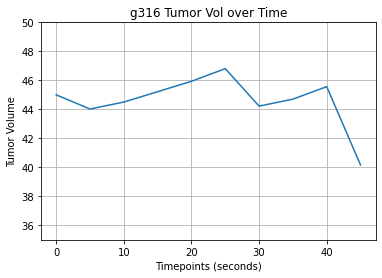

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# max_tumor_per_mouse.loc[max_tumor_per_mouse['Drug Regimen'] == 'Capomulin'] # Find all mouses treated by Capomulin (Selected: g316)
# Set up the axises
gthree_timepoint = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == "g316"]['Timepoint']
gthree_tumor_vol = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == "g316"]['Tumor Volume (mm3)']

# Set up and Display the Graph
plt.title("g316 Tumor Vol over Time")
plt.xlabel("Timepoints (seconds)")
plt.ylabel("Tumor Volume")
plt.ylim(35, 50)
plt.grid()
plt.plot(gthree_timepoint, gthree_tumor_vol)

In [83]:
cap_regimen = max_tumor_per_mouse.loc[max_tumor_per_mouse['Drug Regimen'] == 'Capomulin']
cap_regimen

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


ValueError: x and y must be the same size

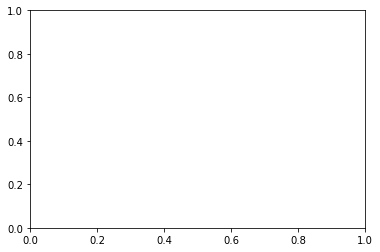

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(cap_regimen["Tumor Volume (mm3)"].agg('mean'), cap_regimen.iloc[:,6])

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cap_regimen.iloc[:,5]


In [89]:
cap_regimen

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3
